## Exploratory data analysis

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Constants

In [13]:
processedFilename = "../data/processedFile.csv"

## Reading file

In [3]:
df = pd.read_csv(processedFilename, header=None)
print ("Total no. of records : {0}".format(len(df)))
df.head()

Total no. of records : 5139


,0,1
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor u c already then say,0
4,nah i don t think he goes to usf he lives arou...,0


In [4]:
df[1].describe()

count    5139.000000
mean        0.124343
std         0.330005
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: 1, dtype: float64

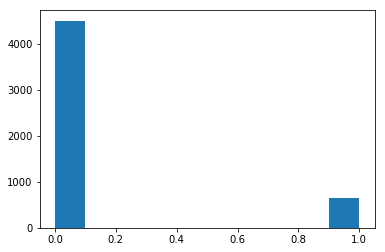

In [10]:
plt.hist(df[1])
plt.show()

This implies our data is not normally distributed. Exact numbers of spam and non-spam content are: 

* Note: 1 implies spam and 0 implies non-spam

In [6]:
Counter(df[1].values)

Counter({0: 4500, 1: 639})

## EDA of sentences

In [7]:
df[0].values

array([ 'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
       'ok lar joking wif u oni',
       'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s',
       ..., 'pity was in mood for that so any other suggestions',
       'the guy did some bitching but i acted like i d be interested in buying something else next week and he gave it to us for free',
       'rofl its true to its name'], dtype=object)

In [8]:
def countWords(sentences):
    """
    Function to count number of words in each sentence from the given list of sentences
    :param sentences : List(String). List of sentences
    :return: List(Integer). List of number of words in each sentence
    """
    countWords = []
    for sentence in sentences:
        countWords.append(len(sentence.split(" ")))
        
    return countWords[:]

numberOfWords = countWords(df[0].values[:])
numberOfWords[:20]

[20, 6, 33, 11, 14, 36, 16, 26, 27, 29, 24, 28, 30, 38, 8, 23, 6, 19, 15, 28]

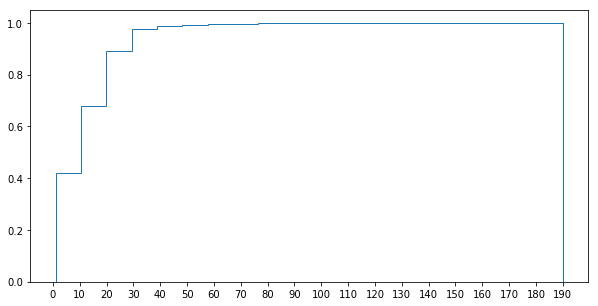

In [9]:
plt.figure(figsize=(10,5))
plt.xticks(np.arange(0, max(numberOfWords)+1, 10.0))
plt.hist(numberOfWords,normed=1,cumulative=True, histtype='step', bins = 20)
plt.show()

This implies approx 90% of sentences contains 30 words or less. This data is very important and will be used when we actually design out LSTM system